In [1]:
import pandas as pd
import numpy as np

In [2]:
output_dir = "Turing_output"

!ls $output_dir

run_1_Turing_data_gpt-4.1.csv	    run_1_Turing_data_gpt-5-mini.csv
run_1_Turing_data_gpt-4.1-mini.csv  run_1_Turing_data_gpt-oss-120b.csv
run_1_Turing_data_gpt-5.csv	    run_1_Turing_data_gpt-oss-20b.csv


In [3]:
output_path = f"{output_dir}/run_1_Turing_data_gpt-5.csv"
print(output_path)

Turing_output/run_1_Turing_data_gpt-5.csv


In [4]:
data = pd.read_csv(output_path)
data.head()

,game_id,human_verdict,confidence,reason,conversation_A_transcript,conversation_B_transcript,label_A,label_B,who_is_human,ai_model,human_correct,likert_evaluation_A,likert_evaluation_B,likert_evaluation_A_mean,likert_evaluation_B_mean,ai_mean_verdict,cv_A,cv_B,elapsed_time
0,3016,B,96,"Witness B sounds casual, as if I'm talking to ...","I: Hello, how's it going?\nW: It's going prett...","I: Hello, how's it going?\nW: chillin, how bou...",Human,gpt-4.5_quinn,A,gpt-4.5_quinn,False,"[5, 1, 1, 1, 1, 4, 5, 2, 4, 1, 1, 4, 2, 1, 1, ...","[5, 5, 5, 5, 1, 5, 5, 1, 4, 4, 2, 3, 3, 5, 1, ...",2.37500,3.53125,B,0.893188,0.250739,82.293248
1,2458,A,-75,they use more slang,I: hi how are you\nW: im doin alright thx\nI: ...,I: hi how are you\nW: I'm great thanks. How ab...,llama-405b_quinn,Human,B,llama-405b_quinn,False,"[5, 5, 5, 5, 1, 5, 5, 1, 4, 2, 1, 2, 3, 1, 4, ...","[5, 1, 1, 1, 1, 5, 5, 1, 3, 1, 1, 3, 2, 3, 1, ...",2.96875,2.93750,A,0.304290,0.513664,99.080858
2,2897,B,25,I would have thought witness A was the real hu...,I: Good evening. Did you have an ordinary day ...,I: Good evening. How did your day go today? Wh...,llama-405b_quinn,Human,B,llama-405b_quinn,True,"[5, 5, 5, 5, 1, 5, 5, 2, 4, 1, 2, 3, 1, 2, 5, ...","[5, 2, 2, 5, 1, 5, 3, 1, 3, 1, 1, 3, 1, 1, 1, ...",2.93750,2.34375,A,0.427433,0.471405,99.671102
3,2686,A,-15,responses seemed more human while witness B re...,I: what is your favorite hobby?\nW: playing vi...,I: what is your favorite hobby?\nW: at the mom...,llama-405b_quinn,Human,B,llama-405b_quinn,False,"[5, 5, 5, 5, 1, 5, 5, 1, 3, 4, 1, 2, 3, 3, 5, ...","[5, 1, 4, 3, 1, 5, 4, 1, 4, 2, 1, 4, 2, 1, 4, ...",3.21875,2.81250,A,0.666551,0.412861,100.293064
4,1955,B,57,seemed more involved in the conversation compa...,I: tell me what you would tell them if you eve...,I: whats something you always wanted to tell t...,gpt-4.5_quinn,Human,B,gpt-4.5_quinn,True,"[5, 5, 5, 5, 1, 5, 5, 3, 4, 1, 4, 4, 1, 4, 4, ...","[5, 5, 5, 5, 1, 5, 5, 2, 5, 2, 5, 5, 1, 3, 4, ...",2.93750,3.37500,B,0.213478,1.025598,97.725511


In [5]:
data.columns

Index(['game_id', 'human_verdict', 'confidence', 'reason',
       'conversation_A_transcript', 'conversation_B_transcript', 'label_A',
       'label_B', 'who_is_human', 'ai_model', 'human_correct',
       'likert_evaluation_A', 'likert_evaluation_B',
       'likert_evaluation_A_mean', 'likert_evaluation_B_mean',
       'ai_mean_verdict', 'cv_A', 'cv_B', 'elapsed_time'],
      dtype='object')

In [6]:
import ast
feature_set_A = data['likert_evaluation_A'].apply(lambda x: ast.literal_eval(str(x))).tolist()
labels_A = data['who_is_human'].apply(lambda x: 1 if x == "A" else 0).tolist()

feature_set_B = data['likert_evaluation_B'].apply(lambda x: ast.literal_eval(str(x))).tolist()
labels_B = data['who_is_human'].apply(lambda x: 1 if x == "B" else 0).tolist()

feature_set = feature_set_A + feature_set_B
labels = labels_A + labels_B

In [7]:
sum(labels), len(data)

(557, 557)

In [8]:
print(feature_set[0], labels[0])

[5, 1, 1, 1, 1, 4, 5, 2, 4, 1, 1, 4, 2, 1, 1, 1, 4, 3, 1, 1, 1, 1, 4, 4, 5, 2, 2, 4, 3, 2, 1, 3] 1


In [9]:
features_array = np.array(feature_set)
labels = np.array(labels)
features_array, labels

(array([[5, 1, 1, ..., 2, 1, 3],
        [5, 5, 5, ..., 1, 1, 3],
        [5, 5, 5, ..., 1, 1, 2],
        ...,
        [5, 5, 4, ..., 1, 2, 1],
        [5, 5, 5, ..., 3, 1, 3],
        [5, 3, 2, ..., 3, 1, 3]], shape=(1114, 32)),
 array([1, 0, 0, ..., 1, 0, 1], shape=(1114,)))

In [10]:
# import random
# seeds = [random.randint(0, 100) for _ in range(20)]
seeds = [57, 14, 20, 10, 82, 89, 8, 23, 45, 19, 45, 95, 44, 64, 80, 30, 10, 8, 72, 95]
seeds

[57, 14, 20, 10, 82, 89, 8, 23, 45, 19, 45, 95, 44, 64, 80, 30, 10, 8, 72, 95]

## 10 fold cross validation with xgboost

In [12]:
import os
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# --- stabilize threading (prevents random slowdowns) ---
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["MKL_NUM_THREADS"] = "4"

# --- make X fast/consistent for XGBoost ---
X = np.asarray(features_array, dtype=np.float32, order="C")
y = np.asarray(labels)

params = dict(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    tree_method="hist",   # CPU-fast and stable
    n_jobs=4,             # match OMP_NUM_THREADS
)

shuffle_means = []

for seed in seeds:
    kf = KFold(n_splits=10, shuffle=True, random_state=seed)
    fold_scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # instantiate per fold (avoids any state weirdness)
        model = XGBClassifier(**params, random_state=seed)
        model.fit(X_train, y_train)

        preds = model.predict(X_val)
        fold_scores.append(accuracy_score(y_val, preds))

    mean_seed = float(np.mean(fold_scores))
    shuffle_means.append(mean_seed)
    print(f"seed={seed}  mean10fold={mean_seed:.4f}")

print("Mean CV accuracy over shuffles:", float(np.mean(shuffle_means)))
print("Std over shuffles:", float(np.std(shuffle_means, ddof=1)))


seed=57  mean10fold=0.8322
seed=14  mean10fold=0.8403
seed=20  mean10fold=0.8267
seed=10  mean10fold=0.8394
seed=82  mean10fold=0.8312
seed=89  mean10fold=0.8411
seed=8  mean10fold=0.8347
seed=23  mean10fold=0.8304
seed=45  mean10fold=0.8267
seed=19  mean10fold=0.8330
seed=45  mean10fold=0.8267
seed=95  mean10fold=0.8322
seed=44  mean10fold=0.8384
seed=64  mean10fold=0.8303
seed=80  mean10fold=0.8411
seed=30  mean10fold=0.8312
seed=10  mean10fold=0.8394
seed=8  mean10fold=0.8347
seed=72  mean10fold=0.8348
seed=95  mean10fold=0.8322
Mean CV accuracy over shuffles: 0.8338332528957528
Std over shuffles: 0.004777139271994385


## 10 fold cross validation with Logistic Regression

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X = np.array(features_array)
y = np.array(labels)

model = LogisticRegression(
    penalty="l1",
    solver="liblinear",   # L1-compatible
    C=1.0,                # inverse regularization strength
    random_state=42
)

accuracies = []
for seed in seeds:
    kf = KFold(n_splits=10, shuffle=True, random_state=seed)
    oof_preds = np.zeros(len(X))
    run_accuracy = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
    
        model.fit(X_train, y_train)
    
        preds = model.predict(X_val)
    
        oof_preds[val_idx] = preds
        score = accuracy_score(y_val, preds)
        accuracies.append(score)
        run_accuracy.append(score)
    print(np.mean(run_accuracy))

# print("10-fold accuracies:", accuracies)
print("Mean CV accuracy over 20 shuffle:", np.mean(accuracies))
print("Std over 20 shuffles:", np.std(accuracies))

0.7755389317889319
0.7692648005148005
0.7755871943371944
0.7665862290862291
0.7763030888030887
0.7701335263835264
0.7826737451737452
0.7746943371943372
0.7710826898326898
0.7774613899613899
0.7710826898326898
0.7791907979407979
0.7774533462033462
0.7764559202059201
0.7746541184041184
0.769385456885457
0.7665862290862291
0.7826737451737452
0.7773487773487774
0.7791907979407979
Mean CV accuracy over 20 shuffle: 0.7746673906048906
Std over 20 shuffles: 0.042090114614933435


In [14]:
# Train final model on the full dataset
model_full = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    random_state=42
)

model_full.fit(X, y)

# Get feature weights
feature_weights = model_full.coef_.ravel()  # shape: (n_features,)
intercept = model_full.intercept_[0]

print("Intercept, b:", intercept)
print("Feature weights, W:", feature_weights)

Intercept, b: -2.127295108480979
Feature weights, W: [ 1.40559888e+00 -2.39049446e-01 -4.86927275e-01  4.66855957e-01
  7.17510650e-01  3.18876622e-01 -7.16179545e-01 -4.20018292e-02
 -1.12405071e-01 -8.43971799e-02  9.58471596e-02 -3.99847703e-01
  7.93882626e-02 -4.00739277e-04 -2.81504613e-01 -1.35237180e-01
  2.20731168e-01 -3.16963701e-02  1.40067840e-01 -3.72726067e-01
 -2.30055208e-01 -1.04006716e-03  2.57549501e-02  3.22449993e-01
 -1.48687828e-01 -2.19624360e-01  0.00000000e+00  2.03008754e-01
 -1.82504894e-03  1.19589743e-01 -9.22095010e-02 -2.65444173e-01]


In [15]:
feature_names = [i for i in range(32)]
feature_names = np.array(feature_names)  # your list of names
for name, w in zip(feature_names, feature_weights):
    print(f"{name}: {w:.4f}")

0: 1.4056
1: -0.2390
2: -0.4869
3: 0.4669
4: 0.7175
5: 0.3189
6: -0.7162
7: -0.0420
8: -0.1124
9: -0.0844
10: 0.0958
11: -0.3998
12: 0.0794
13: -0.0004
14: -0.2815
15: -0.1352
16: 0.2207
17: -0.0317
18: 0.1401
19: -0.3727
20: -0.2301
21: -0.0010
22: 0.0258
23: 0.3224
24: -0.1487
25: -0.2196
26: 0.0000
27: 0.2030
28: -0.0018
29: 0.1196
30: -0.0922
31: -0.2654


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute linear scores for each sample
w = model_full.coef_.ravel()
b = model_full.intercept_[0]

scores = X.dot(w) + b   # shape (n_samples,)

print(w)
print(b)

[ 1.40559888e+00 -2.39049446e-01 -4.86927275e-01  4.66855957e-01
  7.17510650e-01  3.18876622e-01 -7.16179545e-01 -4.20018292e-02
 -1.12405071e-01 -8.43971799e-02  9.58471596e-02 -3.99847703e-01
  7.93882626e-02 -4.00739277e-04 -2.81504613e-01 -1.35237180e-01
  2.20731168e-01 -3.16963701e-02  1.40067840e-01 -3.72726067e-01
 -2.30055208e-01 -1.04006716e-03  2.57549501e-02  3.22449993e-01
 -1.48687828e-01 -2.19624360e-01  0.00000000e+00  2.03008754e-01
 -1.82504894e-03  1.19589743e-01 -9.22095010e-02 -2.65444173e-01]
-2.127295108480979


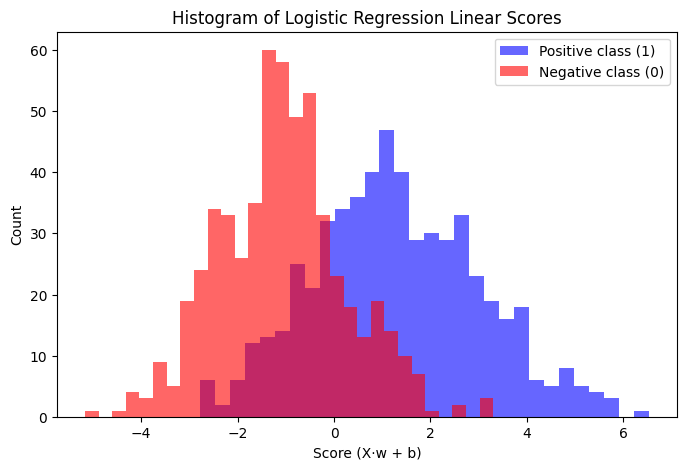

In [17]:
# 2. Split by class
scores_pos = scores[y == 1]
scores_neg = scores[y == 0]

# 3. Plot histogram
plt.figure(figsize=(8, 5))

plt.hist(scores_pos, bins=30, alpha=0.6, color="blue", label="Positive class (1)")
plt.hist(scores_neg, bins=30, alpha=0.6, color="red", label="Negative class (0)")

plt.xlabel("Score (X·w + b)")
plt.ylabel("Count")
plt.legend()
plt.title("Histogram of Logistic Regression Linear Scores")
plt.show()

# Feature Reduction

In [18]:
# After training model_full
w = model_full.coef_.ravel()

# Pick only non-zero features
selected_idx = np.where(np.abs(w) > 0.2)[0]
print("Selected feature count:", len(selected_idx))
print("Selected feature indices:", selected_idx)

X_reduced = X[:, selected_idx]

Selected feature count: 16
Selected feature indices: [ 0  1  2  3  4  5  6 11 14 16 19 20 23 25 27 31]


In [19]:
sorted_idx = selected_idx[np.argsort(-np.abs(w[selected_idx]))]

sorted_idx

array([ 0,  4,  6,  2,  3, 11, 19, 23,  5, 14, 31,  1, 20, 16, 25, 27])

## Selected statements

In [20]:
all_likert = ['Keeps replies brief and casual without over-explaining.',
  'Uses casual slang, abbreviations, and shorthand naturally.',
  'Uses lowercase texting style.',
  'Shows small typos, uneven punctuation, and informal grammar typical of quick texting.',
  'Uses emojis, emoticons, and playful elongations.',
  'Uses casual, playful humor.',
  'Makes niche cultural references from personal memory and assumes shared context.',
  'Tone feels spontaneous, unforced, and opinionated.',
  'Avoids formal, academic phrasing or technical formatting.',
  'Avoids templated placeholders and gives concrete, real details.',
  'Maintains a consistent personal context across turns.',
  "Builds on the other person's message and context.",
  'Clarifies ambiguous questions and self-corrects after clarification.',
  'Uses natural hedging and approximations; shows imperfect recall with hesitations and partial lists.',
  'Admits not knowing and asks to learn instead of inventing details.',
  'Maintains context and answers directly; adds precise situational details when asked.',
  'Stays on topic and steers the conversation rather than mirroring or deflecting.',
  'Shifts topics organically to keep the chat moving.',
  'Shares idiosyncratic, niche preferences and activities instead of safe, generic picks.',
  'Uses natural, idiomatic phrasing.',
  'Explains choices with simple personal reasons and constraints.',
  'Shows brief empathy and supportive reactions.',
  'Adds small personal emotions or judgments.',
  'Shows reciprocity by asking natural, context-aware follow-up questions that advance the chat.',
  'Avoids meta talk about being AI or proving humanness.',
  'Sometimes shows impatience and ends the chat quickly with a brief nicety.',
  'Shares concrete personal experiences and feelings.',
  'Gives direct answers about self with concrete personal details.',
  'Shares concrete personal plans with specific times and activities.',
  'Mentions concrete local places or details without over-explaining.',
  'Shares small, consistent personal details from daily life, routines, courses, and schedules.',
  'References immediate context or recent activity.']

In [21]:
selected_feature_names = [all_likert[i] for i in sorted_idx]
selected_feature_names

['Keeps replies brief and casual without over-explaining.',
 'Uses emojis, emoticons, and playful elongations.',
 'Makes niche cultural references from personal memory and assumes shared context.',
 'Uses lowercase texting style.',
 'Shows small typos, uneven punctuation, and informal grammar typical of quick texting.',
 "Builds on the other person's message and context.",
 'Uses natural, idiomatic phrasing.',
 'Shows reciprocity by asking natural, context-aware follow-up questions that advance the chat.',
 'Uses casual, playful humor.',
 'Admits not knowing and asks to learn instead of inventing details.',
 'References immediate context or recent activity.',
 'Uses casual slang, abbreviations, and shorthand naturally.',
 'Explains choices with simple personal reasons and constraints.',
 'Stays on topic and steers the conversation rather than mirroring or deflecting.',
 'Sometimes shows impatience and ends the chat quickly with a brief nicety.',
 'Gives direct answers about self with c

In [22]:
for i, item in enumerate(selected_feature_names):
    print(f"{i+1}. {item}")

1. Keeps replies brief and casual without over-explaining.
2. Uses emojis, emoticons, and playful elongations.
3. Makes niche cultural references from personal memory and assumes shared context.
4. Uses lowercase texting style.
5. Shows small typos, uneven punctuation, and informal grammar typical of quick texting.
6. Builds on the other person's message and context.
7. Uses natural, idiomatic phrasing.
8. Shows reciprocity by asking natural, context-aware follow-up questions that advance the chat.
9. Uses casual, playful humor.
10. Admits not knowing and asks to learn instead of inventing details.
11. References immediate context or recent activity.
12. Uses casual slang, abbreviations, and shorthand naturally.
13. Explains choices with simple personal reasons and constraints.
14. Stays on topic and steers the conversation rather than mirroring or deflecting.
15. Sometimes shows impatience and ends the chat quickly with a brief nicety.
16. Gives direct answers about self with concrete

## Performance on reduced features

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

model_reduced = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    random_state=42
)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies_reduced = []

for train_idx, val_idx in kf.split(X_reduced):
    X_train, X_val = X_reduced[train_idx], X_reduced[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model_reduced.fit(X_train, y_train)
    preds = model_reduced.predict(X_val)
    accuracies_reduced.append(accuracy_score(y_val, preds))

print("Reduced-feature 10-fold accuracies:", accuracies_reduced)
print("Mean accuracy:", np.mean(accuracies_reduced))


Reduced-feature 10-fold accuracies: [0.6964285714285714, 0.75, 0.8392857142857143, 0.7053571428571429, 0.7747747747747747, 0.8198198198198198, 0.7927927927927928, 0.8018018018018018, 0.8018018018018018, 0.7297297297297297]
Mean accuracy: 0.771179214929215


## Export final weights

In [59]:
model_reduced_full = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    random_state=42
)

model_reduced_full.fit(X_reduced, y)

# Get final weights
w_final = model_reduced_full.coef_.ravel()
b_final = model_reduced_full.intercept_[0]

print("Final intercept:", b_final)
print("Final weights:", w_final)

Final intercept: -2.662356527104765
Final weights: [ 1.37363845 -0.24738157 -0.50058916  0.47030583  0.70788457  0.31244681
 -0.72656591 -0.42661167 -0.31202579  0.12171378 -0.35617664 -0.21888734
  0.34291296 -0.18188883  0.25632848 -0.19050805]


In [74]:
import json
import numpy as np

parameters = {
    "w": w_final.tolist(),
    "b": float(b_final)
}

with open("HAL16_judge_weights.json", "w") as f:
    json.dump(parameters, f, indent=4)

In [75]:
import json
import numpy as np

with open("HAL16_judge_weights.json", "r") as f:
    parameters = json.load(f)

w_final = np.array(parameters["w"])
b_final = parameters["b"]

print(w_final)
print(b_final)

[ 1.37363845 -0.24738157 -0.50058916  0.47030583  0.70788457  0.31244681
 -0.72656591 -0.42661167 -0.31202579  0.12171378 -0.35617664 -0.21888734
  0.34291296 -0.18188883  0.25632848 -0.19050805]
-2.662356527104765


In [76]:
selected_feature_names

['Keeps replies brief and casual without over-explaining.',
 'Uses emojis, emoticons, and playful elongations.',
 'Makes niche cultural references from personal memory and assumes shared context.',
 'Uses lowercase texting style.',
 'Shows small typos, uneven punctuation, and informal grammar typical of quick texting.',
 "Builds on the other person's message and context.",
 'Uses natural, idiomatic phrasing.',
 'Shows reciprocity by asking natural, context-aware follow-up questions that advance the chat.',
 'Uses casual, playful humor.',
 'Admits not knowing and asks to learn instead of inventing details.',
 'References immediate context or recent activity.',
 'Uses casual slang, abbreviations, and shorthand naturally.',
 'Explains choices with simple personal reasons and constraints.',
 'Stays on topic and steers the conversation rather than mirroring or deflecting.',
 'Sometimes shows impatience and ends the chat quickly with a brief nicety.',
 'Gives direct answers about self with c

In [87]:
print("No. | Statement | Weight")
for i  in range(len(w_final)):
    print(f"Q{i+1} |", selected_feature_names[i], f"| {w_final[i]:.4f}")

No. | Statement | Weight
Q1 | Keeps replies brief and casual without over-explaining. | 1.3736
Q2 | Uses emojis, emoticons, and playful elongations. | -0.2474
Q3 | Makes niche cultural references from personal memory and assumes shared context. | -0.5006
Q4 | Uses lowercase texting style. | 0.4703
Q5 | Shows small typos, uneven punctuation, and informal grammar typical of quick texting. | 0.7079
Q6 | Builds on the other person's message and context. | 0.3124
Q7 | Uses natural, idiomatic phrasing. | -0.7266
Q8 | Shows reciprocity by asking natural, context-aware follow-up questions that advance the chat. | -0.4266
Q9 | Uses casual, playful humor. | -0.3120
Q10 | Admits not knowing and asks to learn instead of inventing details. | 0.1217
Q11 | References immediate context or recent activity. | -0.3562
Q12 | Uses casual slang, abbreviations, and shorthand naturally. | -0.2189
Q13 | Explains choices with simple personal reasons and constraints. | 0.3429
Q14 | Stays on topic and steers the 

In [88]:
def hal16_score(arr):
    arr = np.array(arr)
    return float(arr.dot(w_final) + b_final)

hal16_score(X_reduced[0])

1.6079956908145165

## Plot final weights

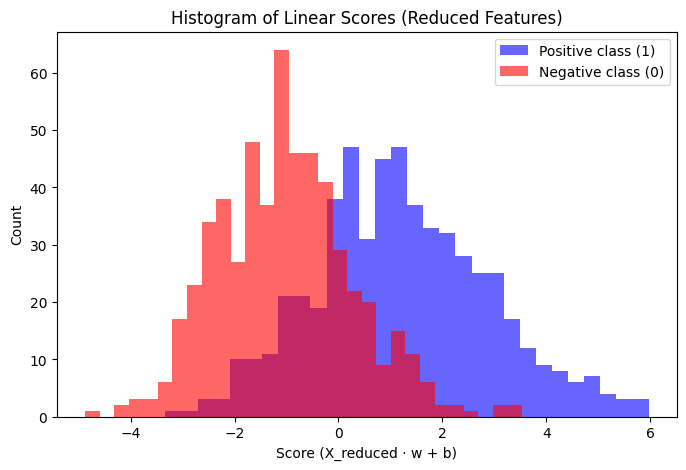

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Compute linear scores
scores_red = X_reduced.dot(w_final) + b_final

# 3. Split by class
scores_pos_red = scores_red[y == 1]
scores_neg_red = scores_red[y == 0]

# 4. Plot histogram
plt.figure(figsize=(8, 5))

plt.hist(scores_pos_red, bins=30, alpha=0.6, color="blue", label="Positive class (1)")
plt.hist(scores_neg_red, bins=30, alpha=0.6, color="red", label="Negative class (0)")

plt.xlabel("Score (X_reduced · w + b)")
plt.ylabel("Count")
plt.legend()
plt.title("Histogram of Linear Scores (Reduced Features)")
plt.show()
